Using TensorFlow backend.


(50000, 28, 28) (50000,)


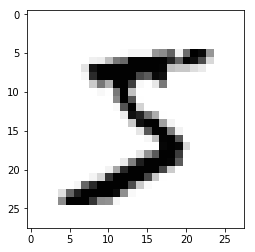

In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [2]:
X_test.shape

(10000, 28, 28)

In [3]:
X_train = X_train.reshape([50000, 784])
X_test = X_test.reshape([10000, 784])

In [4]:
import numpy as np
import tensorflow as tf

In [5]:
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

In [6]:
X = tf.placeholder(tf.float32, shape=(None, 784))
Y = tf.placeholder(tf.float32, shape=(None, 10))
keep_prob = tf.placeholder(tf.float32)

In [7]:
W1 = tf.get_variable("W1", [784, 121], initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.get_variable("b1", [121], initializer = tf.zeros_initializer())
W2 = tf.get_variable("W2", [121, 121], initializer = tf.contrib.layers.xavier_initializer())
b2 = tf.get_variable("b2", [121], initializer = tf.zeros_initializer())
W3 = tf.get_variable("W3", [121, 10], initializer = tf.contrib.layers.xavier_initializer())
b3 = tf.get_variable("b3", [10], initializer = tf.zeros_initializer())

In [8]:
Z1 = tf.matmul(X, W1) + b1
A1 = tf.nn.relu(Z1)
A1 = tf.nn.dropout(A1, keep_prob)
Z2 = tf.matmul(A1, W2) + b2
A2 = tf.nn.relu(Z2)
A2 = tf.nn.dropout(A2, keep_prob)
Z3 = tf.matmul(A2, W3) + b3
A3 = tf.nn.sigmoid(Z3)

In [9]:
def compute_cost(A3, Y):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=A3))
    return cost

In [10]:
cost = compute_cost(A3, Y)

#Lower the learning rate as the training progresses
init_learning_rate = 0.00040
global_step = tf.Variable(0, trainable=False)
#Decay every 100 steps with a base of 0.85
learning_rate = tf.train.exponential_decay(init_learning_rate, global_step, 100, 0.85, staircase=True)
# Passing global_step to minimize() will increment it at each step.

#Replace the steepest gradient descent optimizer with the more sophisticated ADAM optimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)


Cost after 10 epoch: 1.53002
Cost after 20 epoch: 1.50706
Cost after 30 epoch: 1.49614
Cost after 40 epoch: 1.48869
Cost after 50 epoch: 1.48406
Cost after 60 epoch: 1.48028
Cost after 70 epoch: 1.47754
Cost after 80 epoch: 1.47539
Cost after 90 epoch: 1.47364
Cost after 100 epoch: 1.47236
Cost after 110 epoch: 1.47118
Cost after 120 epoch: 1.4702
Cost after 130 epoch: 1.46952
Cost after 140 epoch: 1.46866
Cost after 150 epoch: 1.46797
Cost after 160 epoch: 1.46752
Cost after 170 epoch: 1.46701
Cost after 180 epoch: 1.46658
Cost after 190 epoch: 1.46632
Cost after 200 epoch: 1.46603


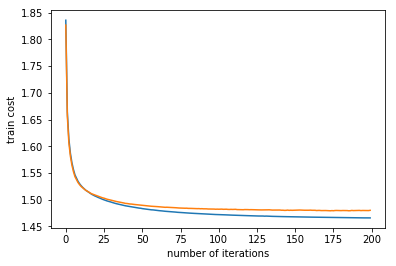

Train Accuracy Score: 0.99486
Test Accuracy Score: 0.9767


In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #For plot
    train_cost = []
    test_cost = []
    batch_size = 1000
    for epoch in range(1, 201):
        for i in range(0, 50000, batch_size):
            sess.run(optimizer, feed_dict={X:X_train[i:i+batch_size], Y: y_train[i:i+batch_size], keep_prob : 0.65})
        train_cost.append(sess.run(cost, feed_dict={X:X_train, Y:y_train, keep_prob : 1}))
        test_cost.append(sess.run(cost, feed_dict={X:X_test, Y:y_test, keep_prob : 1}))
        #Print cost every 10 epoch
        if epoch%10 == 0:
            print("Cost after " + str(epoch)+ " epoch: " + str(train_cost[-1]))
    index = list(range(200))
    plt.plot(index, train_cost, label='Train')
    plt.plot(index, test_cost, label='Test')
    plt.xlabel('number of iterations')
    plt.ylabel('train cost')
    plt.show()
    
    output = tf.argmax(Z3, 1)
    pred = tf.equal(output, tf.argmax(Y,1))

    acc = tf.reduce_mean(tf.cast(pred, "float"))
    train_acc = acc.eval({X: X_train, Y: y_train, keep_prob : 1})
    test_acc = acc.eval({X:X_test, Y: y_test, keep_prob: 1})
    print("Train Accuracy Score:", train_acc)
    print("Test Accuracy Score:", test_acc)
   